In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df=pd.read_csv('municipality_bus_utilization.csv')
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [28]:
df['timestamp']=pd.to_datetime(df['timestamp'],infer_datetime_format=True)

<ipython-input-29-51faa4605e07>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


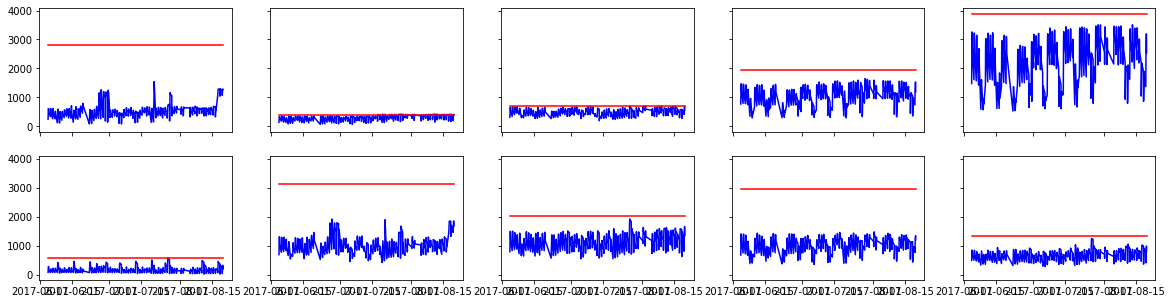

In [29]:
municipalities=[]
for i in range (0,10):
    municipality=df.loc[df['municipality_id']==i]
    # Because a row is added every 30min and we need only hourly data, we take the maximum of every two rows
    municipality=municipality.sort_values(by=['timestamp'])
    municipality=municipality.groupby(np.arange(len(municipality))//2).max()
    municipalities.append(municipality)


# Plot each municipality dataframe
fig1_grid=(2,5)
fig1, axs = plt.subplots(*fig1_grid, sharex=True, sharey=True,figsize=(20,5))
for row in range(0,fig1_grid[0]):
    for col in range(0,fig1_grid[1]):
        i=col+fig1_grid[1]*row
        axs[row,col].plot(municipalities[i]['timestamp'],municipalities[i]['usage'],color='b')
        axs[row,col].plot(municipalities[i]['timestamp'],municipalities[i]['total_capacity'],color='r')
fig1.show()